Emotion Classification Model

Import Libraries

In [293]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [294]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay

Load Dataset

In [295]:
df = pd.read_csv("/content/training.csv")

In [296]:
#Dimesion
df.shape

(16000, 2)

In [297]:
#Datatype of Each column
df.dtypes

,0
text,object
label,int64


In [298]:
print(df['label'].unique()) #Return array of unique values
print(df['label'].value_counts()) #To see how many samples belong to each class

[0 3 2 5 4 1]
label
1    5362
0    4666
3    2159
4    1937
2    1304
5     572
Name: count, dtype: int64


Label Mapping (bcz Labels are nuemeric)

In [299]:
if df['label'].dtype != 'O':
  label_map = {
      0: 'sadness',
      1: 'happy',
      2: 'neutral',
      3: 'anger',
      4: 'fear',
      5: 'surprise'
  }
  df['label'] = df['label'].map(label_map)

In [300]:
df['label'].unique() #Unique values after mapping

array(['sadness', 'anger', 'neutral', 'surprise', 'fear', 'happy'],
      dtype=object)

Clean Labels

In [301]:
df['label'] = df['label'].astype(str).str.lower()

Distributions of Emotions

In [302]:
import seaborn as sns

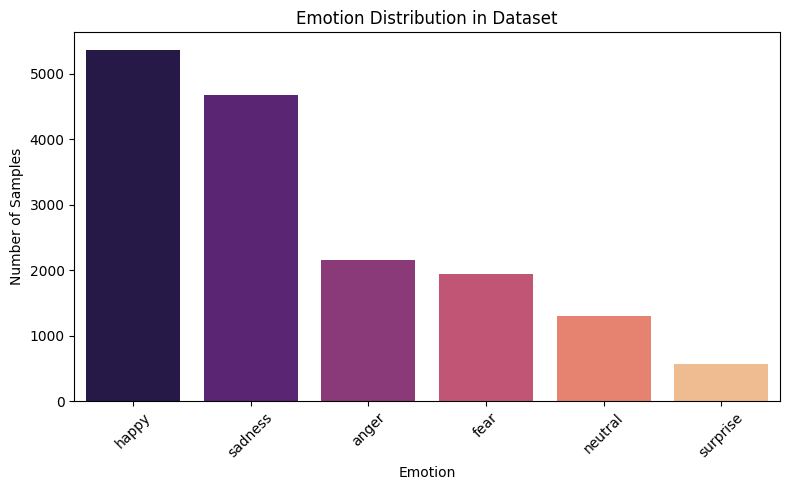

In [303]:
plt.figure(figsize=(8,5))
sns.countplot(x = 'label', data=df, order= df['label'].value_counts().index, palette= 'magma')
plt.title("Emotion Distribution in Dataset")
plt.xlabel("Emotion")
plt.ylabel("Number of Samples")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Split The Dataset

In [304]:
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label'], test_size=0.2, random_state=42)


TF-IDF Vectorizer

In [305]:
vectorizer = TfidfVectorizer(stop_words = 'english', max_features = 1000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

Train Model

In [306]:
model = MultinomialNB()
model.fit(X_train_vec, y_train)

MultinomialNB()

Predict On Test Set

In [307]:
y_pred = model.predict(X_test_vec)

Accuracy

In [308]:
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.81


Confusion Matrix

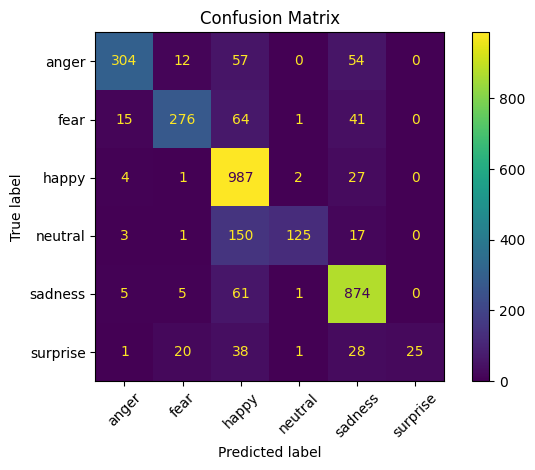

In [309]:
labels = sorted(df['label'].unique())
cm = confusion_matrix(y_test, y_pred, labels = labels)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = labels)
disp.plot(xticks_rotation = 45)
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()

Predict Manually in Code

In [310]:
def test_emotion(sentence):
  vec = vectorizer.transform([sentence])
  prediction = model.predict(vec)[0]
  print(f"Sentence: {sentence}\nPredicted Emotion: {prediction}")

In [311]:
test_emotion("im feeling rather rotten so im not very ambitious right now")

Sentence: im feeling rather rotten so im not very ambitious right now
Predicted Emotion: sadness


In [312]:
test_emotion("i feel a little mellow today")

Sentence: i feel a little mellow today
Predicted Emotion: happy


In [313]:
test_emotion("i find myself in the odd position of feeling supportive of")

Sentence: i find myself in the odd position of feeling supportive of
Predicted Emotion: neutral


In [314]:
test_emotion("i feel just bcoz a fight we get mad to each other n u wanna make a publicity n let the world knows about our fight")

Sentence: i feel just bcoz a fight we get mad to each other n u wanna make a publicity n let the world knows about our fight
Predicted Emotion: anger


In [315]:
test_emotion("i cant walk into a shop anywhere where i do not feel uncomfortable")

Sentence: i cant walk into a shop anywhere where i do not feel uncomfortable
Predicted Emotion: fear


In [316]:
test_emotion("i have seen heard and read over the past couple of days i am left feeling impressed by more than a few companies")

Sentence: i have seen heard and read over the past couple of days i am left feeling impressed by more than a few companies
Predicted Emotion: surprise


Predict: UI Based Using Gradio

In [317]:
import gradio as gr

In [318]:
def predict_emotion(text):
  vec = vectorizer.transform([text])
  pred = model.predict(vec)[0]
  return f"Predicted Emotion: {pred}"


gr.Interface(
    fn = predict_emotion,
    inputs = "text",
    outputs = "text",
    title = "Emotion Detector",
    description = "Enter a sentence and it will predict the emotion"
).launch(share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://380186f0957f1b6231.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
